In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 예측
# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
# Support Vector Machine (예측)
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#평가함수 (분류)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#로지스틱 회귀분석
from statsmodels.api import Logit
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Support Vector Machine (분류)
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
#XG BOOST
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/HMEQ.csv", engine = "python", encoding="CP949")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [3]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols : 
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

REASON : 2
JOB : 6


In [4]:
df_raw["JOB"].fillna("Other", inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [5]:
df_raw['JOB'].value_counts()

Other      1525
ProfExe     929
Office      623
Mgr         477
Self        130
Sales        64
Name: JOB, dtype: int64

In [6]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace =False)
df_raw_y = df_raw_dummy["BAD"]

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [9]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.916
Score on test set: 0.908


In [10]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_knn = pd.DataFrame()
df_accuracy_knn["n_estimators"] = para_n_neighbors
df_accuracy_knn["TrainScore"] = train_accuracy
df_accuracy_knn["TestScore"] = test_accuracy


df_accuracy_knn["D"] = df_accuracy_knn["TrainScore"]-df_accuracy_knn["TestScore"]

df_accuracy_knn.round(3)

,n_estimators,TrainScore,TestScore,D
0,1,1.000,0.877,0.123
1,2,0.928,0.912,0.016
2,3,0.929,0.913,0.017
3,4,0.916,0.914,0.002
4,5,0.916,0.908,0.009
5,6,0.913,0.911,0.002
6,7,0.913,0.912,0.001
7,8,0.910,0.912,-0.002
8,9,0.911,0.913,-0.002
9,10,0.909,0.910,-0.001


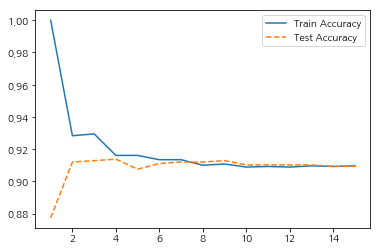

In [16]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [19]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1,11)] * 2

para_weights = (["uniform"] * 10) + (["distance"] * 10)

for v_n_neighbors, v_weights in zip(para_n_neighbors,para_weights) :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weight = pd.DataFrame()
df_accuracy_weight["Neighbors"] = para_n_neighbors
df_accuracy_weight["Weights"] = para_weights
df_accuracy_weight["TrainAccuracy"] = train_accuracy
df_accuracy_weight["TestAccuracy"] = test_accuracy

df_accuracy_weight

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000000,0.877333
1,2,uniform,0.928326,0.912000
2,3,uniform,0.929470,0.912889
3,4,uniform,0.916127,0.913778
4,5,uniform,0.916127,0.907556
5,6,uniform,0.913458,0.911111
6,7,uniform,0.913458,0.912000
7,8,uniform,0.910027,0.912000
8,9,uniform,0.910789,0.912889
9,10,uniform,0.908883,0.910222


In [21]:
df_accuracy_weight_pivot = df_accuracy_weight.pivot(index = "Neighbors", columns = "Weights", values = ["TrainAccuracy","TestAccuracy"])
df_accuracy_weight_pivot.head()

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.877333  0.877333
2                   1.0  0.928326     0.877333  0.912000
3                   1.0  0.929470     0.912000  0.912889
4                   1.0  0.916127     0.913778  0.913778
5                   1.0  0.916127     0.912889  0.907556

In [22]:
level0 = df_accuracy_weight_pivot.columns.get_level_values(0)
level1 = df_accuracy_weight_pivot.columns.get_level_values(1)
df_accuracy_weight_pivot.columns = level0 + "_" + level1
df_accuracy_weight_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.877333,0.877333
2,1.0,0.928326,0.877333,0.912000
3,1.0,0.929470,0.912000,0.912889
4,1.0,0.916127,0.913778,0.913778
5,1.0,0.916127,0.912889,0.907556


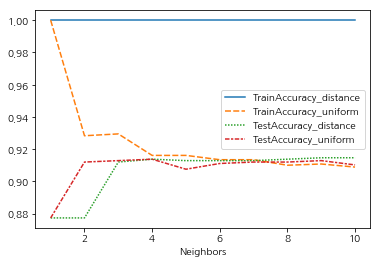

In [25]:
sns.lineplot(data=df_accuracy_weight_pivot)

In [30]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1,11)] * 3

para_metric = (["minkowski"] * 10) + (["euclidean"] * 10) + (["manhattan"] * 10)

for (v_n_neighbors, v_metric) in zip(para_n_neighbors,para_metric) :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights = "uniform", metric = v_metric)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy

df_accuracy_metric

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000000,0.877333
1,2,minkowski,0.928326,0.912000
2,3,minkowski,0.929470,0.912889
3,4,minkowski,0.916127,0.913778
4,5,minkowski,0.916127,0.907556
5,6,minkowski,0.913458,0.911111
6,7,minkowski,0.913458,0.912000
7,8,minkowski,0.910027,0.912000
8,9,minkowski,0.910789,0.912889
9,10,minkowski,0.908883,0.910222


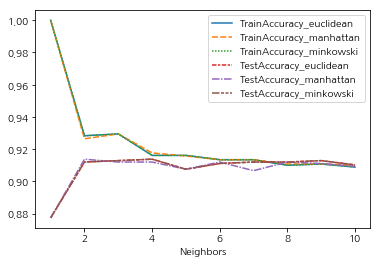

In [31]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric", values = ["TrainAccuracy","TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1

sns.lineplot(data = df_accuracy_metric_pivot)

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=4, weights="uniform", metric="euclidean")
knn_model.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(knn_model.score(df_test_x, df_test_y)))

Score on training set: 0.916
Score on test set: 0.914


In [36]:
y_pred = knn_model.predict(df_test_x)

print("Accuracy on training set: {0:.3f}\n".format(knn_model.score(df_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.916

Accuracy on test set: 0.914

Confusion Matrix: 
[[1018    3]
 [  94   10]]


In [37]:
estimator = KNeighborsClassifier()

param_grid = {"n_neighbors" : para_n_neighbors, "weights" : para_weights, "metric" : para_metric}
grid_knn = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_knn.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_knn.best_estimator_))
print("\nbest parameter: \n{}".format(grid_knn.best_params_))
print("\nbest score:\n{}".format(grid_knn.best_score_.round(3)))

best estimator model: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

best parameter: 
{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

best score:
0.91
